In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

df18_23 = pd.read_csv('../Data/ProducedData/refined_df18_23.csv')

In [93]:
dfdf = df18_23[['YEAR','POVERTY3','ALDAYPWK']].dropna()

In [94]:
dfdf.groupby('POVERTY3')['ALDAYPWK'].mean()

POVERTY3
1.0    2.491875
2.0    2.621997
3.0    2.902235
Name: ALDAYPWK, dtype: float64

### Permuting ALDAYPWK over Poverty Level

In [95]:
ALmeans = dfdf.groupby('POVERTY3')['ALDAYPWK'].mean()
AL_sim_means = [ALmeans]
num_sim = 1000
AL_col = dfdf['ALDAYPWK'].values

for i in range(num_sim-1):
    np.random.shuffle(AL_col)
    dfdf['ALDAYPWK'] = AL_col
    sim_mean = dfdf.groupby('POVERTY3')['ALDAYPWK'].mean()
    AL_sim_means.append(sim_mean)

AL_sim_means_df = pd.DataFrame(AL_sim_means).reset_index()

In [113]:
obpov1 = ALmeans.loc[1]
obpov2 = ALmeans.loc[2]
obpov3 = ALmeans.loc[3]

In [97]:
AL_sim_means_df

POVERTY3,index,1.0,2.0,3.0
0,ALDAYPWK,2.491875,2.621997,2.902235
1,ALDAYPWK,2.820838,2.820285,2.810200
2,ALDAYPWK,2.799399,2.821063,2.813493
3,ALDAYPWK,2.827666,2.826735,2.807829
4,ALDAYPWK,2.835996,2.800601,2.811649
...,...,...,...,...
995,ALDAYPWK,2.823570,2.807940,2.812198
996,ALDAYPWK,2.817288,2.792037,2.816348
997,ALDAYPWK,2.821794,2.812834,2.811518
998,ALDAYPWK,2.820019,2.804493,2.813450


In [110]:
smpov1 = AL_sim_means_df[1].mean()
smpov2 = AL_sim_means_df[2].mean()
smpov3 = AL_sim_means_df[3].mean()

In [117]:
pval1 = np.mean(np.abs(smpov1 - smpov1.mean()) >= np.abs(obpov1 - smpov1.mean()))
pval2 = np.mean(np.abs(smpov2 - smpov2.mean()) >= np.abs(obpov2 - smpov2.mean()))
pval3 = np.mean(np.abs(smpov3 - smpov3.mean()) >= np.abs(obpov3 - smpov3.mean()))

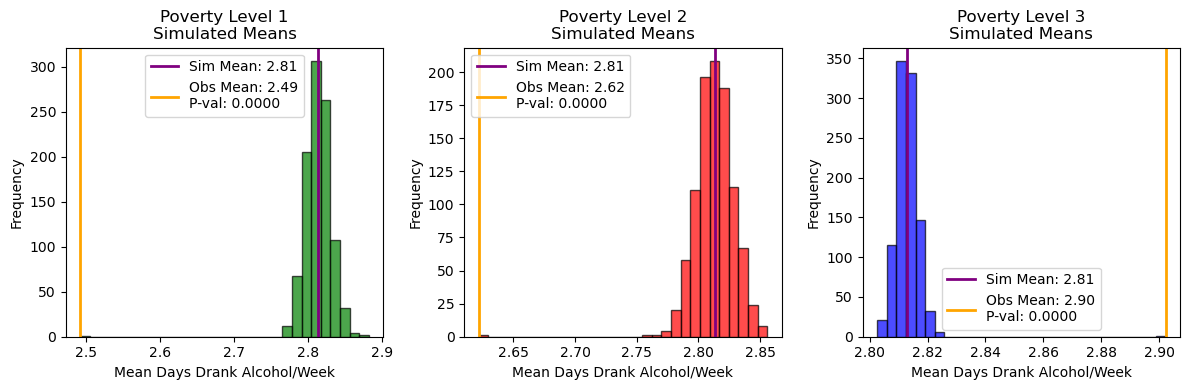

In [141]:
pov1 = AL_sim_means_df[1]
pov2 = AL_sim_means_df[2]
pov3 = AL_sim_means_df[3]

plt.figure(figsize=(12, 4))

# --- POVERTY LEVEL 1 ---
plt.subplot(1, 3, 1)
plt.hist(pov1, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title("Poverty Level 1\nSimulated Means")
plt.axvline(smpov1, color='purple', linewidth=2, label=f'Sim Mean: {smpov1:.2f}')
plt.axvline(obpov1, color='orange', linewidth=2, label=f'Obs Mean: {obpov1:.2f}\nP-val: {pval1:.4f}')
plt.xlabel("Mean Days Drank Alcohol/Week")
plt.ylabel("Frequency")
plt.legend()

# --- POVERTY LEVEL 2 ---
plt.subplot(1, 3, 2)
plt.hist(pov2, bins=30, color='red', alpha=0.7, edgecolor='black')
plt.axvline(smpov2, color='purple', linewidth=2, label=f'Sim Mean: {smpov2:.2f}')
plt.axvline(obpov2, color='orange', linewidth=2, label=f'Obs Mean: {obpov2:.2f}\nP-val: {pval2:.4f}')
plt.title("Poverty Level 2\nSimulated Means")
plt.xlabel("Mean Days Drank Alcohol/Week")
plt.ylabel("Frequency")
plt.legend()

# --- POVERTY LEVEL 3 ---
plt.subplot(1, 3, 3)
plt.hist(pov3, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(smpov3, color='purple', linewidth=2, label=f'Sim Mean: {smpov3:.2f}')
plt.axvline(obpov3, color='orange', linewidth=2, label=f'Obs Mean: {obpov3:.2f}\nP-val: {pval3:.4f}')
plt.title("Poverty Level 3\nSimulated Means")
plt.xlabel("Mean Days Drank Alcohol/Week")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.savefig('../Images/Gen_ALDAYPWK_Permuttion.png')
plt.show()


### Permuting Yearly ALDAYPWK over Poverty Level across time to see how significant our observed values in the graph below are

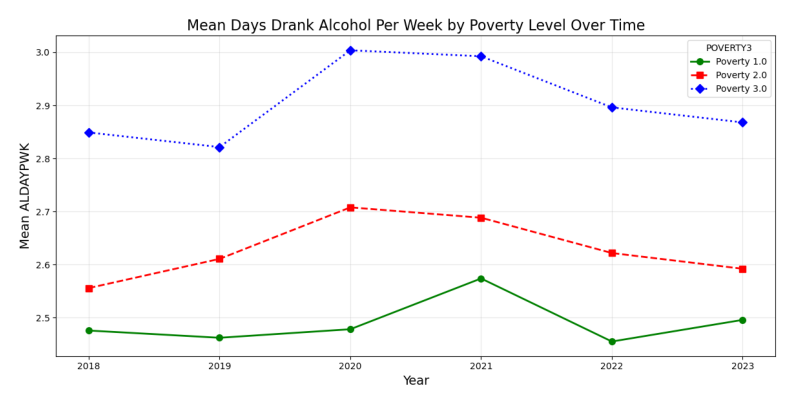

In [100]:
x = '../Images/mean_days_drank_alc_per_wk_by_poverty_over_time.png'

img = mpimg.imread(x)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [101]:
ALPWK_pov_means = df18_23.groupby(['YEAR','POVERTY3'])['ALDAYPWK'].mean().reset_index()
ALPWK_pov_means

,YEAR,POVERTY3,ALDAYPWK
0,2018,1.0,2.475847
1,2018,2.0,2.555879
2,2018,3.0,2.849011
3,2019,1.0,2.462264
4,2019,2.0,2.610846
5,2019,3.0,2.821447
6,2020,1.0,2.478326
7,2020,2.0,2.707892
8,2020,3.0,3.003809
9,2021,1.0,2.573964


In [126]:
APK_means = [ALPWK_pov_means]
num_sim = 1000
df_perm = dfdf.copy() 

for i in range(num_sim - 1):
    df_perm['ALDAYPWK_perm'] = (df_perm.groupby('YEAR')['ALDAYPWK'].transform(lambda x: np.random.permutation(x)))
    sim_means = (df_perm.groupby(['YEAR','POVERTY3'])['ALDAYPWK_perm'].mean().reset_index().rename(columns={'ALDAYPWK_perm':'ALDAYPWK'}))
    APK_means.append(sim_means)

APK_means_df = pd.concat(APK_means, keys=range(num_sim))
APK_means_df.groupby(['YEAR','POVERTY3'])['ALDAYPWK'].mean().reset_index()



,YEAR,POVERTY3,ALDAYPWK
0,2018,1.0,2.795652
1,2018,2.0,2.798080
2,2018,3.0,2.796258
3,2019,1.0,2.823677
4,2019,2.0,2.825712
5,2019,3.0,2.826877
6,2020,1.0,2.828145
7,2020,2.0,2.827261
8,2020,3.0,2.826278
9,2021,1.0,2.819992


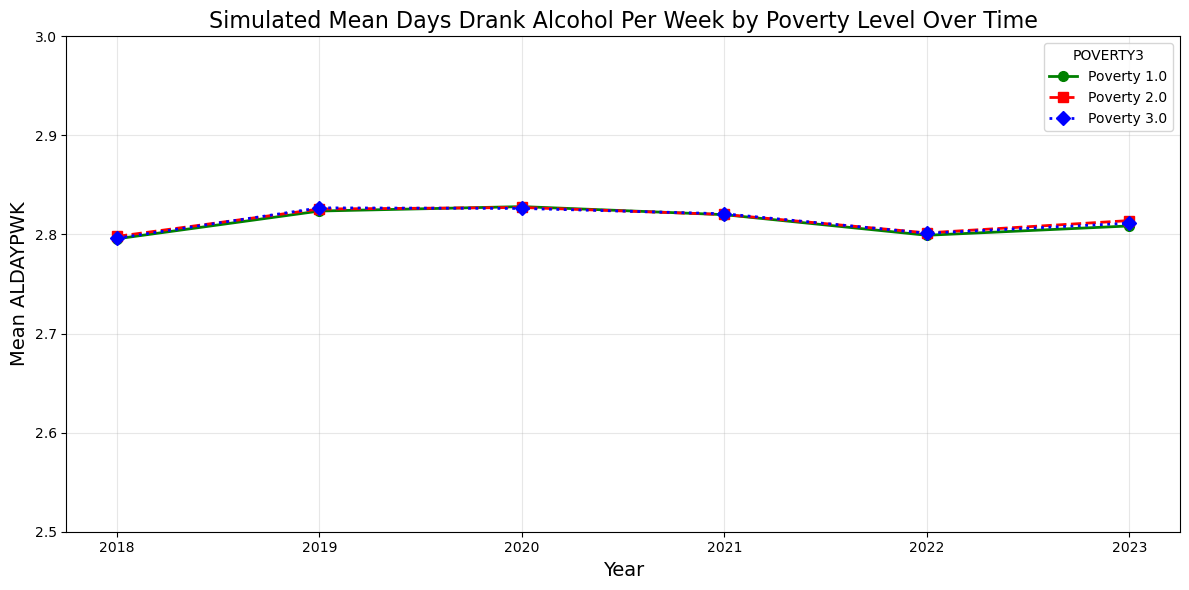

In [134]:
APKgrouped = APK_means_df.groupby(['YEAR','POVERTY3'])['ALDAYPWK'].mean().reset_index()

APKpivot_df = APKgrouped.pivot(index='YEAR', columns='POVERTY3', values='ALDAYPWK')


styles = {
    1.0: {"color": "green",  "marker": "o", "linestyle": "-"},
    2.0: {"color": "red",   "marker": "s", "linestyle": "--"},
    3.0: {"color": "blue", "marker": "D", "linestyle": ":"},
}

plt.figure(figsize=(12,6))

for col in APKpivot_df.columns:
    style = styles.get(col, {})
    plt.plot(
        APKpivot_df.index,
        APKpivot_df[col],
        label=f"Poverty {col}",
        linewidth=2,
        markersize=7,
        **style
    )

plt.title("Simulated Mean Days Drank Alcohol Per Week by Poverty Level Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean ALDAYPWK", fontsize=14)
plt.ylim(2.5, 3.0)
plt.legend(title="POVERTY3")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../Images/sim_mean_days_drank_alc_per_wk_by_poverty_over_time.png')
plt.show()

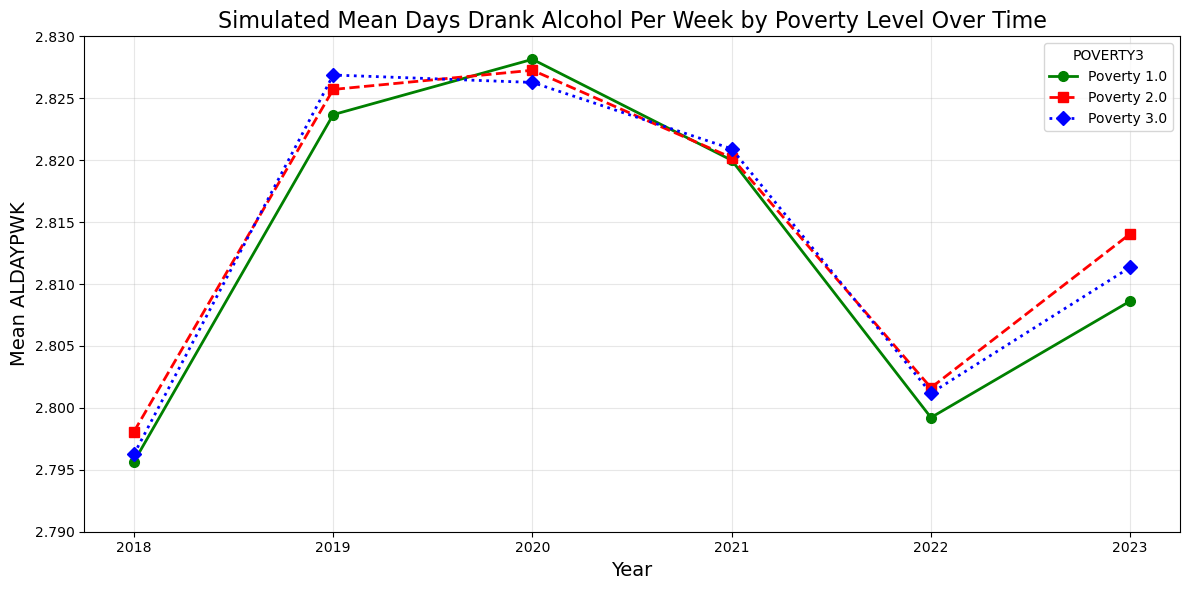

In [140]:
APKgrouped = APK_means_df.groupby(['YEAR','POVERTY3'])['ALDAYPWK'].mean().reset_index()

APKpivot_df = APKgrouped.pivot(index='YEAR', columns='POVERTY3', values='ALDAYPWK')


styles = {
    1.0: {"color": "green",  "marker": "o", "linestyle": "-"},
    2.0: {"color": "red",   "marker": "s", "linestyle": "--"},
    3.0: {"color": "blue", "marker": "D", "linestyle": ":"},
}

plt.figure(figsize=(12,6))

for col in APKpivot_df.columns:
    style = styles.get(col, {})
    plt.plot(
        APKpivot_df.index,
        APKpivot_df[col],
        label=f"Poverty {col}",
        linewidth=2,
        markersize=7,
        **style
    )

plt.title("Simulated Mean Days Drank Alcohol Per Week by Poverty Level Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean ALDAYPWK", fontsize=14)
plt.ylim(2.79, 2.83)
plt.legend(title="POVERTY3")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../Images/zoomed_sim_mean_days_drank_alc_per_wk_by_poverty_over_time.png')
plt.show()

In [130]:
APK_means_df = APK_means_df.reset_index(level=0).rename(columns={'level_0': 'sim'})

def perm_p_for_group(g):
    """
    g: all rows for one (YEAR, POVERTY3) across all sims
    """
    obs = g.loc[g['sim'] == 0, 'ALDAYPWK'].iloc[0]      # observed mean
    sim = g.loc[g['sim'] != 0, 'ALDAYPWK'].values       # null distribution
    center = sim.mean()  # null mean

    # two-sided p-value, with +1 smoothing to avoid 0
    extreme = np.abs(sim - center) >= np.abs(obs - center)
    p = (extreme.sum() + 1) / (len(sim) + 1)

    return pd.Series({
        'obs_mean': obs,
        'null_mean': center,
        'p_value': p
    })

pvals_df = (
    APK_means_df
    .groupby(['YEAR', 'POVERTY3'], as_index=False)
    .apply(perm_p_for_group)
)

pvals_df


/var/folders/z8/bl_7nkyx47jbqddsydgr6cb80000gn/T/ipykernel_63800/4160253830.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(perm_p_for_group)


,YEAR,POVERTY3,obs_mean,null_mean,p_value
0,2018,1.0,2.475847,2.795972,0.001
1,2018,2.0,2.555879,2.798323,0.001
2,2018,3.0,2.849011,2.796205,0.001
3,2019,1.0,2.462264,2.824039,0.001
4,2019,2.0,2.610846,2.825927,0.001
5,2019,3.0,2.821447,2.826882,0.514
6,2020,1.0,2.478326,2.828495,0.001
7,2020,2.0,2.707892,2.827381,0.007
8,2020,3.0,3.003809,2.826100,0.001
9,2021,1.0,2.573964,2.820238,0.001


In [104]:
df18_23 = df18_23.copy()
df18 = df18_23[df18_23['YEAR'] == 2018]
df19 = df18_23[df18_23['YEAR'] == 2019]
df20 = df18_23[df18_23['YEAR'] == 2020]
df21 = df18_23[df18_23['YEAR'] == 2021]
df22 = df18_23[df18_23['YEAR'] == 2022]
df23 = df18_23[df18_23['YEAR'] == 2023]

dflist = [df18,df19,df20,df21,df22,df23]

In [128]:
df18.groupby('POVERTY3')['ALDAYPWK'].mean()

POVERTY3
1.0    2.475847
2.0    2.555879
3.0    2.849011
Name: ALDAYPWK, dtype: float64

In [105]:
df18means = df18.groupby('POVERTY3')['ALDAYPWK'].mean().reset_index()